#### Problem:

An Ecommerce company based in New York City that sells clothing online but they also have in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want.

The company is trying to decide whether to focus their efforts on their mobile app experience or their website. |

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Ecommerce Customers')

In [3]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [4]:
df.columns = df.columns.str.lower().str.replace('.','').str.replace(' ','_')

In [5]:
df['address'] = df['address'].str.split(',').str[1].str.split(' ').str[1]

In [6]:
df.head()

,email,address,avatar,avg_session_length,time_on_app,time_on_website,length_of_membership,yearly_amount_spent
0,mstephenson@fernandez.com,MI,Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,CA,DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,DC,Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,OH,SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,PR,MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   email                 500 non-null    object 
 1   address               470 non-null    object 
 2   avatar                500 non-null    object 
 3   avg_session_length    500 non-null    float64
 4   time_on_app           500 non-null    float64
 5   time_on_website       500 non-null    float64
 6   length_of_membership  500 non-null    float64
 7   yearly_amount_spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [8]:
df.drop(columns=['email','avatar'], inplace=True)

In [9]:
df.head()

,address,avg_session_length,time_on_app,time_on_website,length_of_membership,yearly_amount_spent
0,MI,34.497268,12.655651,39.577668,4.082621,587.951054
1,CA,31.926272,11.109461,37.268959,2.664034,392.204933
2,DC,33.000915,11.330278,37.110597,4.104543,487.547505
3,OH,34.305557,13.717514,36.721283,3.120179,581.852344
4,PR,33.330673,12.795189,37.536653,4.446308,599.406092


In [10]:
df.corr()

,avg_session_length,time_on_app,time_on_website,length_of_membership,yearly_amount_spent
avg_session_length,1.000000,-0.027826,-0.034987,0.060247,0.355088
time_on_app,-0.027826,1.000000,0.082388,0.029143,0.499328
time_on_website,-0.034987,0.082388,1.000000,-0.047582,-0.002641
length_of_membership,0.060247,0.029143,-0.047582,1.000000,0.809084
yearly_amount_spent,0.355088,0.499328,-0.002641,0.809084,1.000000


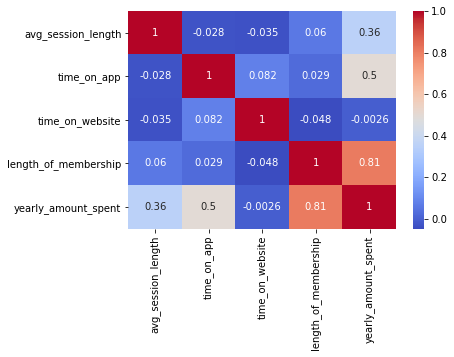

In [11]:
sns.heatmap(df.corr(), cmap='coolwarm', annot=True)

##### The answer to the project question is pretty obvious, the company should spend either i) forget the website, or ii) make the crappy website better.
Lets just play along

In [12]:
df.head()

,address,avg_session_length,time_on_app,time_on_website,length_of_membership,yearly_amount_spent
0,MI,34.497268,12.655651,39.577668,4.082621,587.951054
1,CA,31.926272,11.109461,37.268959,2.664034,392.204933
2,DC,33.000915,11.330278,37.110597,4.104543,487.547505
3,OH,34.305557,13.717514,36.721283,3.120179,581.852344
4,PR,33.330673,12.795189,37.536653,4.446308,599.406092


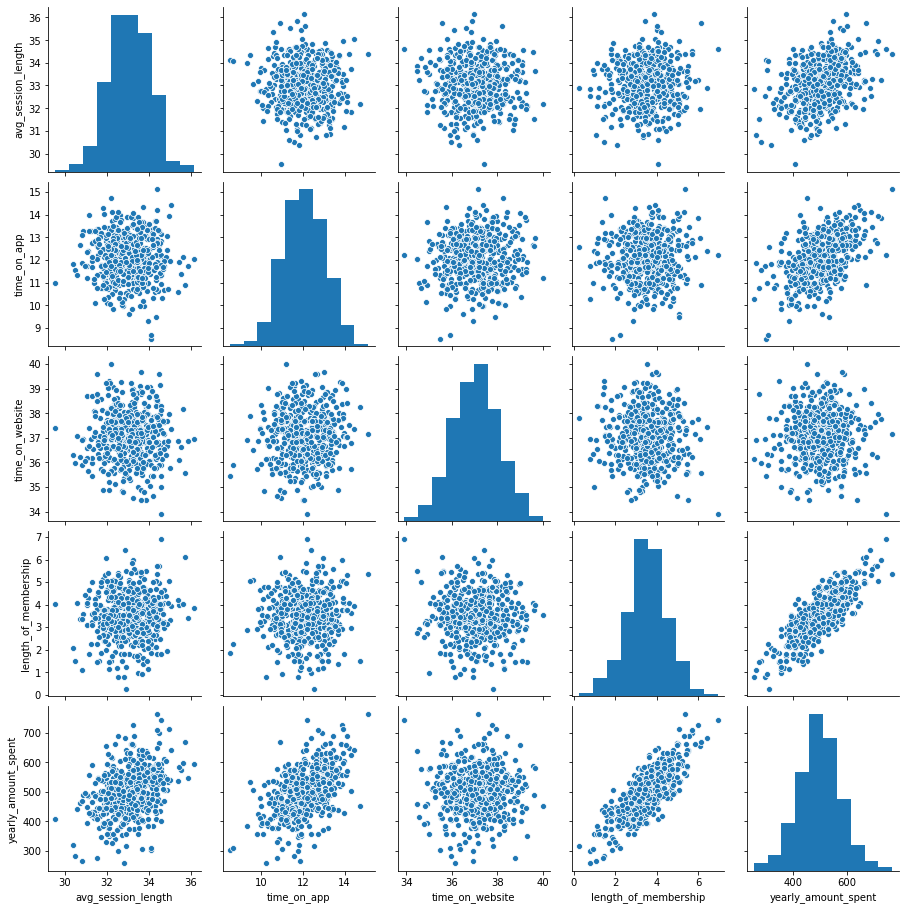

In [13]:
sns.pairplot(df)

In [14]:
X = df[['avg_session_length','time_on_app','length_of_membership']]
y = df['yearly_amount_spent']

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [16]:
lreg = LinearRegression()

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [18]:
lreg.fit(X_train, y_train)

LinearRegression()

In [19]:
y_pred = pd.Series(lreg.predict(X_test))

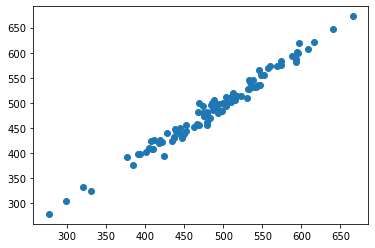

In [20]:
plt.scatter(y_test, y_pred)

In [21]:
lreg.score(X_test, y_test)

0.9777203388374341

In [22]:
lreg.score(X_train, y_train)

0.9854090539296939

In [23]:
pd.DataFrame(lreg.coef_, X.columns, columns=['Coeff'])

,Coeff
avg_session_length,25.599105
time_on_app,38.811217
length_of_membership,61.882279


In [24]:
lreg.intercept_

-1033.1207980077972

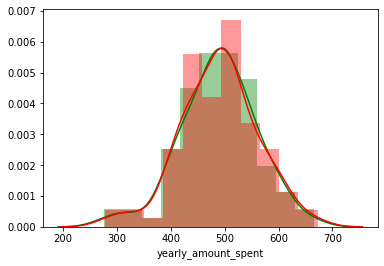

In [25]:
sns.distplot(y_test, color='green')
sns.distplot(y_pred, color='red')

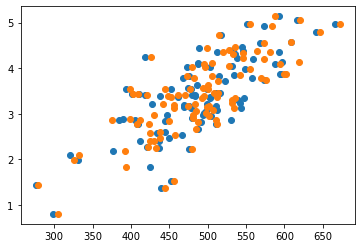

In [26]:
plt.scatter(y_test, X_test['length_of_membership'])
plt.scatter(y_pred, X_test['length_of_membership'])

##### Not bad!